**Skrypt do biblioteki przetwarzania danych**
Zofia Hendrysiak

Linki do danych:

https://www.gov.pl/web/finanse/udzialy-za-2020-r

https://www.gov.pl/web/finanse/udzialy-za-2019-r

https://stat.gov.pl/obszary-tematyczne/ludnosc/ludnosc/ludnosc-stan-i-struktura-ludnosci-oraz-ruch-naturalny-w-przekroju-terytorialnym-stan-w-dniu-31-12-2020,6,29.html

Link do githuba projektu:

https://github.com/osienka/NYPD.git

In [1]:
!git clone https://github.com/osienka/NYPD.git

Cloning into 'NYPD'...
remote: Enumerating objects: 260, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (219/219), done.
remote: Total 260 (delta 78), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (260/260), 2.97 MiB | 8.88 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [2]:
!pip install --upgrade xlrd
!pip install --upgrade openpyxl
import matplotlib.pyplot as plt
import pandas as pd
import NYPD.Projekt.analiza.analizy.czytanie.wczytywanie as czyt
import NYPD.Projekt.analiza.analizy.liczenie.liczenie as licz

     |████████████████████████████████| 96 kB 2.3 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


W poniższej komórce zadeklarowane są globalne zmienne - przyjęty procent ludności płacącej podatki oraz procent podatku
PIT, który trafia do poszczególnych jednostek samorządu terytorialnego

In [3]:
PROCPRAC = 0.75 ##Procent osób płacących podatki w tym emeryci
PROCPODAT = 17 ##Wszyscy opodatkowani wg pierwszego progu - 17%
#Procent z podatku PIT trafiający do poszczególnych jednostek samorządu terytorialnego
PROCWOJ = 1.6
PROCPOW = 10.25
PROCGMIN = 39
PROCMET = 5

In [4]:
gm20 = czyt.load_jst("./NYPD/Projekt/dane/20210215_Gminy_2_za_2020.xlsx")
woj20 = czyt.load_jst("./NYPD/Projekt/dane/20210211_Województwa_za_2020.xlsx")
pow20 = czyt.load_jst("./NYPD/Projekt/dane/20210211_Powiaty_za_2020.xlsx")
miasta20 = czyt.load_jst("./NYPD/Projekt/dane/20210215_Miasta_NPP_2_za_2020.xlsx")
gm19 = czyt.load_jst("./NYPD/Projekt/dane/20200214_Gminy_za_2019.xlsx")
woj19 = czyt.load_jst("./NYPD/Projekt/dane/20200214_Wojewodztwa_za_2019.xlsx")
pow19 = czyt.load_jst("./NYPD/Projekt/dane/20200214_Powiaty_za_2019.xlsx")
miasta19 = czyt.load_jst("./NYPD/Projekt/dane/20200214_Miasta_NPP_za_2019.xlsx")
print(woj20)

    0     1     2     3                    4   ...  9          10         11  12  13
0   02  None  None  None         dolnośląskie  ...  10  143787146  143787146 NaN NaN
1   04  None  None  None   kujawsko-pomorskie  ...  10   77938448   77938448 NaN NaN
2   06  None  None  None            lubelskie  ...  10   65228210   65228210 NaN NaN
3   08  None  None  None             lubuskie  ...  10   38895731   38895731 NaN NaN
4   10  None  None  None              łódzkie  ...  10  106927491  106927491 NaN NaN
5   12  None  None  None          małopolskie  ...  10  154769447  154769447 NaN NaN
6   14  None  None  None          mazowieckie  ...  10  380227237  380227237 NaN NaN
7   16  None  None  None             opolskie  ...  10   36183042   36183042 NaN NaN
8   18  None  None  None         podkarpackie  ...  10   65682244   65682244 NaN NaN
9   20  None  None  None            podlaskie  ...  10   40759371   40759371 NaN NaN
10  22  None  None  None            pomorskie  ...  10  111320530

In [5]:
woj_lud = czyt.load_lud("./NYPD/Projekt/dane/Tabela_II.xls")
pow_lud = czyt.load_lud("./NYPD/Projekt/dane/Tabela_III.xls")
gm_lud = czyt.load_lud("./NYPD/Projekt/dane/Tabela_IV.xls")
miasta19_lud = czyt.lacz(miasta19, pow_lud)
miasta20_lud = czyt.lacz(miasta20, pow_lud)
gm19_lud = czyt.lacz(gm19,gm_lud)
gm20_lud = czyt.lacz(gm20, gm_lud)
pow20_lud = czyt.lacz(pow20,pow_lud)
pow19_lud = czyt.lacz(pow19,pow_lud)
woj19_lud = czyt.lacz(woj19, woj_lud)
woj20_lud = czyt.lacz(woj20, woj_lud)
jst = [gm19_lud,gm20_lud,pow19_lud,pow20_lud,miasta19_lud,miasta20_lud,woj19_lud,woj20_lud]
nazwy = ["gm19_lud","gm20_lud","pow19_lud","pow20_lud","miasta19_lud","miasta20_lud","woj19_lud","woj20_lud"]

In [11]:
for i in range(len(jst)):
  print("Dochód dla ", nazwy[i] , "to: ", licz.dochod_jst(jst[i]))


Dochód dla  gm19_lud to:  {'0201011': 42635709, '0201022': 14040656, '0201032': 3549854, '0201043': 9496560, '0201052': 6054744, '0201062': 5885961, '0202011': 23329893, '0202021': 31451223, '0202033': 7113901, '0202041': 3631766, '0202052': 6677101, '0202062': 5245357, '0202073': 3924108, '0203011': 86452099, '0203022': 9975706, '0203032': 8624753, '0203042': 3826226, '0203052': 1429568, '0203062': 2419209, '0204013': 13117735, '0204022': 1268040, '0204032': 2661111, '0204043': 4439006, '0205011': 21521767, '0205023': 5962122, '0205032': 3545880, '0205042': 2690307, '0205052': 2661562, '0205062': 2806858, '0206011': 5197264, '0206021': 8964057, '0206031': 6224988, '0206041': 5495104, '0206052': 2986092, '0206062': 9632418, '0206072': 8480031, '0206082': 7752960, '0206092': 3317323, '0207011': 15174946, '0207022': 6995076, '0207033': 7319688, '0207042': 2794083, '0208011': 4034432, '0208021': 24325332, '0208031': 6568079, '0208041': 18803465, '0208051': 6642365, '0208063': 13070793, '0

Wykres średnich dochodów opodatkowanych dla  gm19_lud


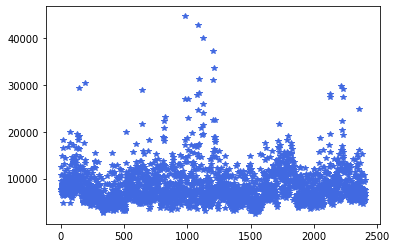

Wykres średnich dochodów opodatkowanych dla  gm20_lud


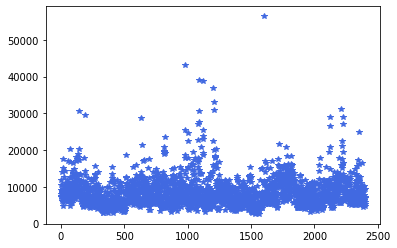

Wykres średnich dochodów opodatkowanych dla  pow19_lud


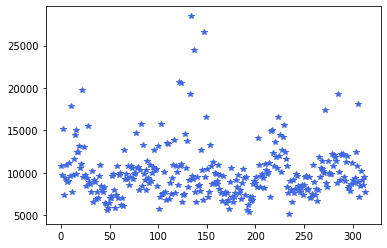

Wykres średnich dochodów opodatkowanych dla  pow20_lud


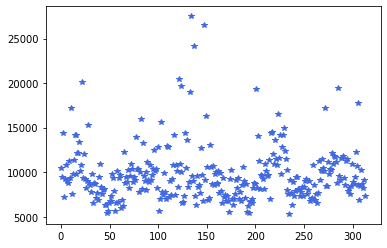

Wykres średnich dochodów opodatkowanych dla  miasta19_lud


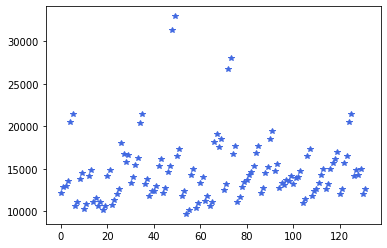

Wykres średnich dochodów opodatkowanych dla  miasta20_lud


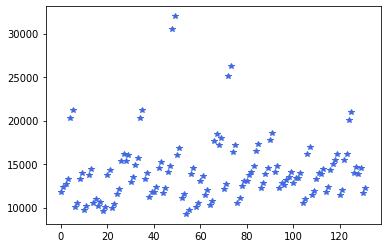

Wykres średnich dochodów opodatkowanych dla  woj19_lud


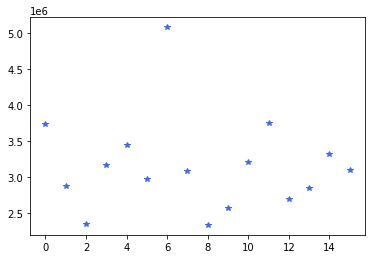

Wykres średnich dochodów opodatkowanych dla  woj20_lud


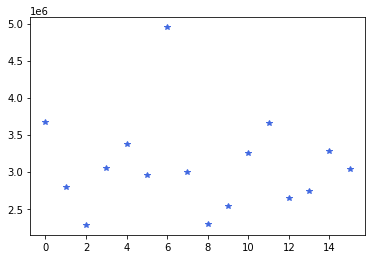

In [19]:
for i in range(len(jst)):
  plt.plot(licz.sr_dochod_opodatkowany(jst[i])["mean"], "*", color="royalblue")
  print("Wykres średnich dochodów opodatkowanych dla ", nazwy[i])
  plt.show()


In [25]:
for i in range(len(jst)):
  print("Średnie ważone dochodów dla ", nazwy[i])
  print(licz.licz_war_i_sr(licz.sr_dochod_opodatkowany(jst[i]))[1])
  print("Wariancje dochodów dla", nazwy[i])
  print(licz.licz_war_i_sr(licz.sr_dochod_opodatkowany(jst[i]))[0])


Średnie ważone dochodów dla  gm19_lud
{'bolesławiecki': 10291.605221288557, 'dzierżoniowski': 9211.117203557878, 'głogowski': 14417.658641289741, 'górowski': 7034.41412720181, 'jaworski': 8913.59589577639, 'jeleniogórski': 10368.637031883402, 'kamiennogórski': 8527.958114154282, 'kłodzki': 8600.416062715789, 'legnicki': 10577.944070723219, 'lubański': 9158.097078871771, 'lubiński': 17056.08745043801, 'lwówecki': 7322.854236205665, 'milicki': 9225.203804347826, 'oleśnicki': 11052.342236816416, 'oławski': 13775.439847156444, 'polkowicki': 14290.935674089775, 'strzeliński': 9381.172697493605, 'średzki': 11647.701385328037, 'świdnicki': 11158.105910089502, 'trzebnicki': 12566.493155860388, 'wałbrzyski': 10068.581099361858, 'wołowski': 10492.644474796052, 'wrocławski': 18784.688956505317, 'ząbkowicki': 9009.694471277417, 'zgorzelecki': 12418.50483476786, 'złotoryjski': 9227.743124617433, 'aleksandrowski': 8038.252856689823, 'brodnicki': 8906.252764602641, 'bydgoski': 14759.22256798602, 'che

In [26]:
porwoj19 = licz.porownaj_przewidywany(licz.sr_dochod_opodatkowany(woj19_lud),
                                      licz.licz_war_i_sr(licz.sr_dochod_opodatkowany(pow19_lud))[1],
                                      licz.licz_war_i_sr(licz.sr_dochod_opodatkowany(miasta19_lud))[1])
print("Porównanie województw i powiatów 2019", porwoj19)

Porównanie województw i powiatów 2019 {'dolnośląskie': 3705243.7037085164, 'kujawsko-pomorskie': 2853468.9981460143, 'lubelskie': 2329863.379694354, 'lubuskie': 3140359.7645202684, 'łódzkie': 3418851.955557063, 'małopolskie': 2947943.434566691, 'mazowieckie': 5035181.462108964, 'opolskie': 3054847.7401269395, 'podkarpackie': 2319017.607503257, 'podlaskie': 2557189.176826702, 'pomorskie': 3186866.4731145212, 'śląskie': 3722227.900772392, 'świętokrzyskie': 2680066.0661826595, 'warmińsko-mazurskie': 2826714.3701175475, 'wielkopolskie': 3290107.7017049096, 'zachodniopomorskie': 3082469.598644578}


In [28]:
porwoj20 = licz.porownaj_przewidywany(licz.sr_dochod_opodatkowany(woj20_lud),
                                      licz.licz_war_i_sr(licz.sr_dochod_opodatkowany(pow20_lud))[1],
                                      licz.licz_war_i_sr(licz.sr_dochod_opodatkowany(miasta20_lud))[1])
print("Porównanie województw i powiatów 2020", porwoj20)

Porównanie województw i powiatów 2020 {'dolnośląskie': 3636048.8842225447, 'kujawsko-pomorskie': 2776010.8117793896, 'lubelskie': 2260912.23600987, 'lubuskie': 3031306.098830048, 'łódzkie': 3341797.551138977, 'małopolskie': 2921848.2758439826, 'mazowieckie': 4909499.169730976, 'opolskie': 2974103.2241864507, 'podkarpackie': 2268866.7197495997, 'podlaskie': 2509752.11604841, 'pomorskie': 3226993.333025952, 'śląskie': 3624408.232441535, 'świętokrzyskie': 2623396.8863312476, 'warmińsko-mazurskie': 2716890.973649177, 'wielkopolskie': 3243125.348027287, 'zachodniopomorskie': 3011673.1216930086}


In [29]:
porpow19 = licz.porownaj_przewidywany(licz.sr_dochod_opodatkowany(pow19_lud), licz.licz_war_i_sr(
    licz.sr_dochod_opodatkowany(gm19_lud))[1])
print("Porównanie powiatów i gmin 2019", porpow19)

Porównanie powiatów i gmin 2019 {'bolesławiecki': 512.1431223705567, 'dzierżoniowski': 458.3762024501448, 'głogowski': 717.4706385248901, 'górowski': 350.0566789488512, 'jaworski': 443.56685712788385, 'jeleniogórski': 515.9763701066404, 'kamiennogórski': 424.3792914786227, 'kłodzki': 427.98518599930685, 'legnicki': 526.3932439522432, 'lubański': 455.7372426455895, 'lubiński': 848.7673127258458, 'lwówecki': 364.4099323842038, 'milicki': 459.07648657289064, 'oleśnicki': 550.0005209601477, 'oławski': 685.5133741357222, 'polkowicki': 711.1631653507593, 'strzeliński': 466.83827756345454, 'średzki': 433.06697334343335, 'świdnicki': -1153.9192875179742, 'trzebnicki': 625.3505717510434, 'wałbrzyski': 501.0454773834899, 'wołowski': 522.1465712794143, 'wrocławski': 934.7881672595831, 'ząbkowicki': 448.3524553584066, 'zgorzelecki': 617.986837455981, 'złotoryjski': 459.20281645242903, 'aleksandrowski': 400.010085804769, 'brodnicki': 443.2035738721588, 'bydgoski': 734.4666947856495, 'chełmiński': 4

In [27]:
porpow20 = licz.porownaj_przewidywany(licz.sr_dochod_opodatkowany(pow20_lud), licz.licz_war_i_sr(
    licz.sr_dochod_opodatkowany(gm20_lud))[1])
print("Porównanie powiatów i gmin 2020", porpow20)

Porównanie powiatów i gmin 2020 {'bolesławiecki': 474.80520634708046, 'dzierżoniowski': 427.5168905037135, 'głogowski': 654.8865422230265, 'górowski': 329.4160732488981, 'jaworski': 420.92318009639166, 'kamiennogórski': 406.6299355966494, 'kłodzki': 399.877174899937, 'legnicki': 513.5314931634057, 'lubański': 426.54333243819383, 'lubiński': 783.4378163053807, 'lwówecki': 341.7952723619901, 'milicki': 444.10667297855434, 'oleśnicki': 513.8307536736775, 'oławski': 641.5827185445833, 'polkowicki': 645.6281549570303, 'strzeliński': 445.48511642938684, 'średzki': 301.5309812071573, 'świdnicki': -1210.279444757356, 'trzebnicki': 606.1747933867191, 'wałbrzyski': 459.2012561001211, 'wołowski': 490.4531709680905, 'wrocławski': 913.9068644770341, 'ząbkowicki': 667.3423498353604, 'zgorzelecki': 544.9534886721158, 'złotoryjski': 421.0008612824313, 'aleksandrowski': 371.6965279854094, 'brodnicki': 410.7841075881297, 'bydgoski': 695.2635763889521, 'chełmiński': 396.4739308545577, 'golubsko-dobrzyńsk